In [25]:
import numpy as np
import matplotlib.pyplot as plt

from createData import createData
from feedforward import FeedForwardNN, BCELoss

# This pipeline is a showcase of the feedforward neural network I implemented from scratch in the feedforward.py file

(150, 2)
[0.77589186 0.59364747]


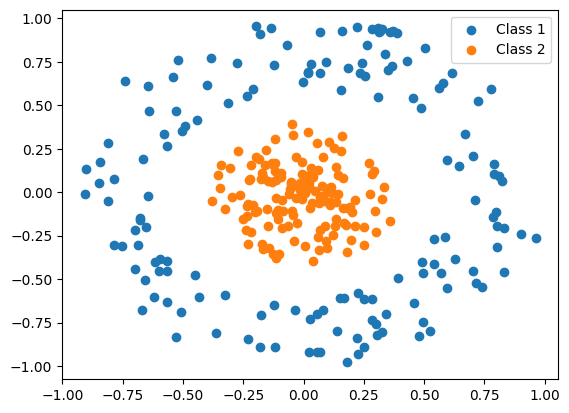

In [26]:
class1, class2 = createData(150, 150)
print(class1.shape)
print(class1[0])
plt.scatter(class1[:,0], class1[:,1], label="Class 1")
plt.scatter(class2[:,0], class2[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

### Create neural network

In [27]:
nn = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 3, hidden_units = [10, 10, 10], activation = "relu", output_activation = "sigmoid")
weights = nn.weights()
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

(10, 2)
[[-0.50442359 -0.13059549]
 [-0.31163657 -0.61022694]
 [-0.19558816 -0.5181338 ]
 [-0.42525777 -0.36645383]
 [ 0.40251947  0.32107564]
 [-0.05826019 -0.20046565]
 [ 0.30146651  0.39949284]
 [ 0.31585587  0.20178762]
 [ 0.10513559  0.67414546]
 [ 0.38090034 -0.61246403]]
(10, 10)
[[ 0.25729205 -0.02492716  0.26573113  0.04630106 -0.31277903 -0.01282574
   0.11031152 -0.11668975  0.13625749  0.08723597]
 [-0.17176332  0.00503228  0.29100819  0.03772734  0.06429987 -0.01952118
   0.26573077 -0.17819558  0.19359327 -0.16842533]
 [ 0.28198137 -0.03696698 -0.14942322 -0.2431478   0.08223399 -0.1343354
  -0.18787133 -0.177045    0.21802193  0.09093807]
 [ 0.24679861  0.15184816  0.18820618  0.20978195  0.13869135 -0.25018831
  -0.3159847  -0.27630429 -0.16642464 -0.23189567]
 [-0.10690174 -0.0438818   0.03293896  0.04946297  0.26263126  0.06638053
   0.24206813  0.00757965 -0.16159459 -0.17670206]
 [ 0.07767735 -0.00350105  0.24832416 -0.21165081 -0.11309564 -0.25343443
  -0.20567814 

### Quick forward call

In [28]:
input = class1[0]
output = nn.forward(input)
print(output)
loss = BCELoss(output[0], 1)
print(loss)

[0.5016516414282722]
0.6898493415571179


### Train network on the two classes

In [29]:
nr_epochs = 300
learning_rate = 0.001
running_loss = 0
loss1 = []
loss2 = []
rloss = []

# training loop
for epoch in range(nr_epochs):
    # class1
    for i in range(class1.shape[0]):
        output = nn.forward(class1[i])[0]
        current_loss = BCELoss(output, 0)
        loss1.append(current_loss)
        running_loss += current_loss
        # backprop to add current sample output to network gradient
        nn.backprop(class1[i], output, 0, "BCELoss")
    
    # class2
    for i in range(class2.shape[0]):
        output = nn.forward(class2[i])[0]
        current_loss = BCELoss(output, 1)
        loss2.append(current_loss)
        running_loss += current_loss
        # backprop to add current sample output to network gradient
        nn.backprop(class2[i], output, 1, "BCELoss")

    # after every epoch, take a step along negative gradient (after step, the gradients reset)
    nn.step(learning_rate)

    rloss.append(running_loss/(class1.shape[0] * 2))
    running_loss = 0

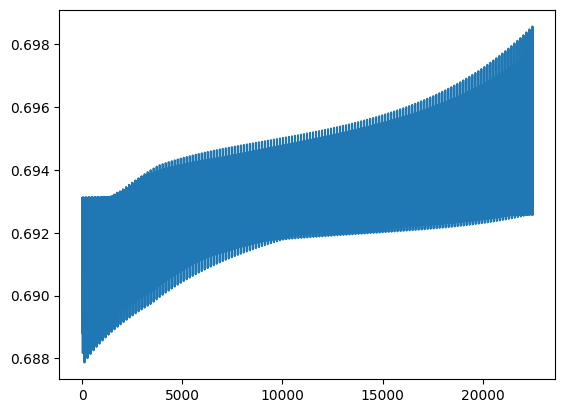

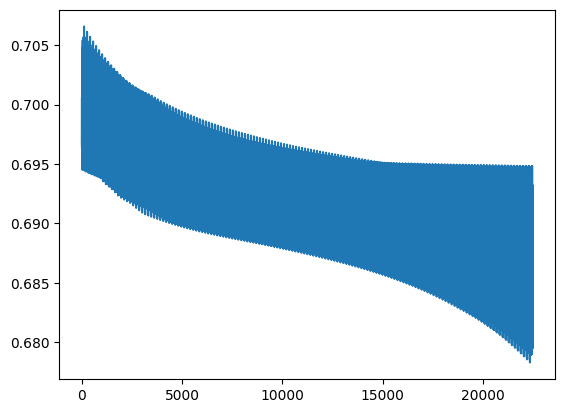

<function matplotlib.pyplot.show(close=None, block=None)>

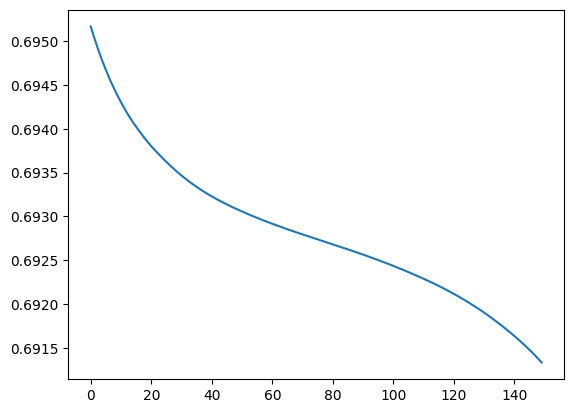

In [30]:
plt.plot(loss2)
plt.show()

plt.plot(loss1)
plt.show()

plt.plot(rloss)
plt.show